# Post extra - Investing.com API

## Download programático da cotação de ETFs (e manter as análises sempre actualizadas)

Este post é com o objectivo de explicar como trabalhar com a API do investing e uma forma simples de mantermos as análises que fizemos no post 1 actualizadas de forma simples, não sendo necessário andar sempre a fazer o download de ficheiros CSV do investing com as cotações.

Neste post vamos usar o [investpy](https://investpy.readthedocs.io/) assim como o Portfolio Lab para imitar o Post 1 através da API do investing. Temos contudo de aprender a trabalhar com a API e identificar exactamente o activo do qual pretendemos obter as cotações. Este post vai-se focar apenas em ETFs, tal como o Post 1. Mais para a frente vamos trabalhar com indíces e potencialmente fundos, dentro da API do Investing.

Dentro de como trabalhar com ETFs temos apenas de aprender duas funções que criei no Portfolio Lab:

**search_etf_investing()** e **get_quotes_investing_etf()**

**Nota:** Como vamos trabalhar com uma biblioteca nova não se esqueçam de a instalar com *pip install investpy* na na Anaconda Prompt.

### Função search_etf_investing

Como disse vamos imitar o Post 1 e como tal vamos sacar os dados de IS3Q e IWDA. Mas para isso primeiro temos de saber o que colocar na função de download para a API saber o que queremos. Temos por isso que fazer uma pesquisa. A pesquisa pode ser por ticker ou isin como vamos ver abaixo, com resultados diferentes.

In [1]:
# Import libraries
import pandas as pd
import cufflinks as cf

import PortfolioLab as pl

# Set cufflinks offline
cf.go_offline()

In [2]:
pl.search_investing_etf(tickers=['IWDA', 'IS3Q'], visual='jupyter')

,symbol,isin,stock_exchange,currency,name,country
8542,IWDA,IE00B4L5Y983,London,USD,iShares Core MSCI World UCITS,united kingdom
6300,IWDA,IE00B4L5Y983,Amsterdam,EUR,iShares Core MSCI World UCITS,netherlands


,symbol,isin,stock_exchange,currency,name,country
2886,IS3Q,IE00BP3QZ601,Xetra,EUR,iShares MSCI World Quality Factor UCITS,germany


Como vimos podemos fazer uma pesquisa simples pelos tickers usando a opção tickers da função. Adicionei a opção *display="jupyter'* para que o resultado apareça mais bonito, caso estejemos a usar Jupyter Lab. Como podemos ver temos já informação relevante sobre os ETFs que pesquisamos. 

Vamos experimentar por ISINs:

In [3]:
pl.search_investing_etf(isins=['IE00B4L5Y983', 'IE00BP3QZ601'], visual='jupyter')

,symbol,isin,stock_exchange,currency,name,country
2865,EUNL,IE00B4L5Y983,Xetra,EUR,iShares Core MSCI World UCITS,germany
4845,SWDA,IE00B4L5Y983,Milan,EUR,iShares Core MSCI World UCITS,italy
6300,IWDA,IE00B4L5Y983,Amsterdam,EUR,iShares Core MSCI World UCITS,netherlands
7270,SWDA,IE00B4L5Y983,Switzerland,USD,iShares Core MSCI World UCITS,switzerland
8542,IWDA,IE00B4L5Y983,London,USD,iShares Core MSCI World UCITS,united kingdom
8557,SWDA,IE00B4L5Y983,London,GBP,iShares Core MSCI World UCITS,united kingdom


,symbol,isin,stock_exchange,currency,name,country
2886,IS3Q,IE00BP3QZ601,Xetra,EUR,iShares MSCI World Quality Factor UCITS,germany
5048,IWQU,IE00BP3QZ601,Milan,EUR,iShares MSCI World Quality Factor UCITS,italy
7358,IWQU,IE00BP3QZ601,Switzerland,USD,iShares MSCI World Quality Factor UCITS,switzerland
8670,IWFQ,IE00BP3QZ601,London,GBP,iShares MSCI World Quality Factor UCITS,united kingdom
8886,IWQU,IE00BP3QZ601,London,USD,iShares MSCI World Quality Factor UCITS,united kingdom


Como podemos ver uma pesquisa por ISINs dá resultados ligeiramente diferente porque encontra mais ETFs do que uma simples pesquisa por ticker/symbol. Isto porque há ET&Fs com o mesmo ISIN mas tickers diferentes. De qualquer das formas podemos encontrar facilmente os ETFs que pretendemos. IWDA cotado em Amsterdam e o IS3Q cotado no Xetra, tal como no post 1.

Vamos então buscar as cotações.

### Função search_etf_investing

Para usarmos a API vamos precisar do name e country de cada ETF de que queremos cotações. Se quisermos temos também a opção colnames, onde podemos colocar os nomes que quisermos para identificar os ETFs, no meu caso coloquei os tickers.

Podemos colocar quantos nomes quiserem, dentro de parêntises rectos e separados por vírgulas. A ordem entre names, countries e colnames TEM de ser a mesma. Às vezes, como neste caso a API lança um aviso, se não tiverem a usar a "bolsa" principal, que normalmente é a que tem maior volume. Não se preocupem com isso, desde que de facto tenham escolhido a bolsa correcta.

In [4]:
names = ['iShares Core MSCI World UCITS', 'iShares MSCI World Quality Factor UCITS']
countries = ['netherlands', 'germany']
colnames = ['IWDA', 'IS3Q']


etfs = pl.get_quotes_investing_etf(names=names, countries=countries, colnames=colnames,
                                     begin='1990-01-01', end='2025-01-01')

C:\Users\PC\anaconda3\lib\site-packages\investpy\etfs.py:583: Warning:

Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "united kingdom" and default stock_exchange: "London".



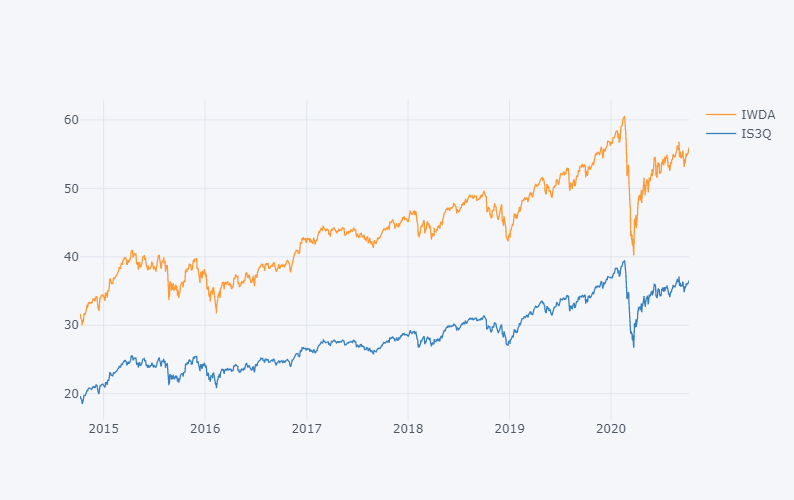

In [5]:
etfs.iplot(dimensions=pl.dimensions)

Tal como no post 1 podemos fazer o gráfico com as cotações ou o gráfico de crecimento. Contudo em vez de usarmos outra função podemos usar directamente na função de download das cotações ao colocarmos a opção *growth_index=True*.

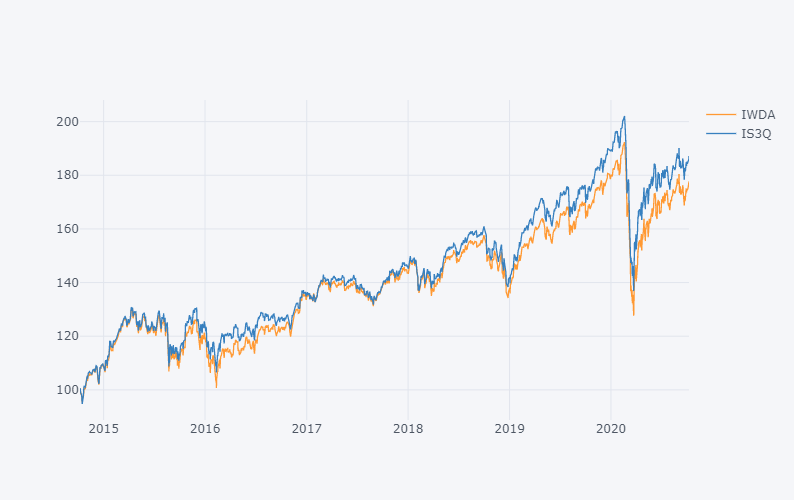

In [6]:
names = ['iShares Core MSCI World UCITS', 'iShares MSCI World Quality Factor UCITS']
countries = ['netherlands', 'germany']
colnames = ['IWDA', 'IS3Q']


etfs = pl.get_quotes_investing_etf(names=names, countries=countries, colnames=colnames,
                                  begin='1990-01-01', end='2025-01-01',
                                  growth_index=True)

etfs.iplot(dimensions=pl.dimensions)

Por último imaginemos que queriam as cotações de muitos ETFs sem qualquer tipo de tratamento de dados, pois como vimos acima a análise começa no ponto em que o ETF mais recente começou a ser transaccionado. Mas sabemos que o IWDA existe antes de 2015.

A solução é simplesmente passarmos a opção *merge='outer'* que significa que vai fundir os ETFs numa DataFrame com o mesmo indíce mas sem apagar ou acrescentar dados nenhuns, o que poderá levar a alguns ETFs terem dias "vazios", como se pode ver no gráfico abaixo nas primeiras cotações do IS3Q. Isto é útil se quiserem juntar uma base de dados e/ou passar a informação num ficheiro excel.

In [7]:
etfs = pl.get_quotes_investing_etf(names=names, countries=countries, colnames=colnames,
                                  begin='1990-01-01', end='2025-01-01',
                                  merge='outer')

etfs

,IWDA,IS3Q
Date,,
2009-10-14,17.20,nan
2009-10-15,17.15,nan
2009-10-16,17.09,nan
2009-10-19,17.32,nan
2009-10-20,17.20,nan
...,...,...
2020-10-02,54.89,35.99
2020-10-05,55.24,36.18
2020-10-06,55.40,36.22


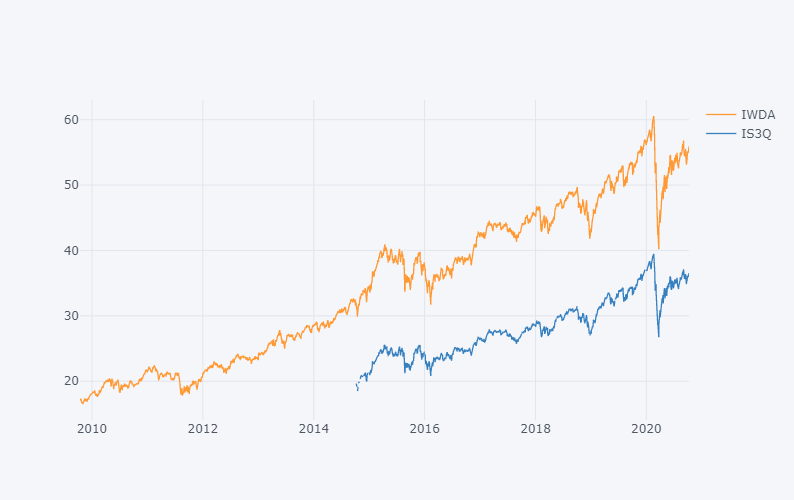

In [8]:
etfs.iplot(dimensions=pl.dimensions)

Vamos agora gravar num Excel:

In [10]:
etfs.to_excel('etfs.xlsx')